In [1]:
from pathlib import Path
from pyprojroot import here

import orthodb_tools.sql_queries as sql_queries
import orthodb_tools.tools.general_utils as tools
import iupred_tools as iuptools
import numpy as np
import pandas as pd
import yaml
from Bio import Align, AlignIO, Seq, SeqIO
import re


In [2]:
BENCHMARK_DIR = here() / "benchmark" / "benchmark_v4" / "p1_table"
benchmark_df = pd.read_csv(BENCHMARK_DIR / "benchmark_table.csv")

In [3]:
import orthodb_tools.env_variables.env_variables as env
ORTHODB_DATABASE = env.orthoDBDatabase()

In [4]:
def get_seq_length(odb_gene_id: str) -> int:
    return len(ORTHODB_DATABASE.data_all_seqrecords_dict[odb_gene_id].seq)

In [5]:
benchmark_df['seq_length'] = benchmark_df['gene_id'].apply(get_seq_length)

In [6]:
benchmark_df.groupby('ELM_motif_class')['verified interaction'].value_counts().unstack().fillna(0)

verified interaction,False,True
ELM_motif_class,,
DOC_WW_Pin1_4,328,82
LIG_14-3-3_CanoR_1,334,55
LIG_AP2alpha_2,341,50
LIG_EH_1,335,56
LIG_SH2_GRB2like,341,30
LIG_SH3_CIN85_PxpxPR_1,345,33
TRAF6,294,12
enah_LPPPP_FPPPP,327,36


In [8]:
benchmark_df[benchmark_df['verified interaction']]['gene_id'].nunique()

177

<Axes: ylabel='Frequency'>

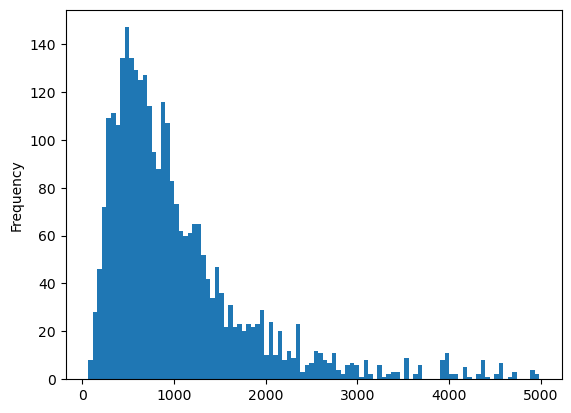

In [13]:
benchmark_df['seq_length'].plot.hist(bins=100)

In [18]:
benchmark_df[(benchmark_df['ELM_motif_class'] == 'enah_LPPPP_FPPPP') & (benchmark_df['verified interaction']) & (benchmark_df['seq_length'] > 4000)]

,Organism,Primary_Acc,Accessions,UniprotID,regex,hit_sequence,gene_id,hit start position,hit end position,verified interaction,ELM_motif_class,name,reference DOI,seq_length
2338,Homo sapiens,NaN,NaN,Q12955,[FL]PPPP,FPPPP,9606_0:0027f1,3253,3257,True,enah_LPPPP_FPPPP,ANK3_HUMAN,NaN,4377
2339,Homo sapiens,NaN,NaN,Q14517,[FL]PPPP,LPPPP,9606_0:00122c,4307,4311,True,enah_LPPPP_FPPPP,FAT1_HUMAN,NaN,4588
2340,Homo sapiens,NaN,NaN,Q14517,[FL]PPPP,FPPPP,9606_0:00122c,4434,4438,True,enah_LPPPP_FPPPP,FAT1_HUMAN,NaN,4588


In [16]:
benchmark_df[benchmark_df['seq_length']<4000].groupby('ELM_motif_class')['verified interaction'].value_counts().unstack().fillna(0)

verified interaction,False,True
ELM_motif_class,,
DOC_WW_Pin1_4,318,82
LIG_14-3-3_CanoR_1,327,55
LIG_AP2alpha_2,337,50
LIG_EH_1,331,56
LIG_SH2_GRB2like,337,30
LIG_SH3_CIN85_PxpxPR_1,342,33
TRAF6,289,12
enah_LPPPP_FPPPP,327,33
